# **PART-1**

**1. Load the Datasets**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist, fashion_mnist

# Load MNIST Digits dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

# Load MNIST Fashion dataset
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2. Preview the Datasets**

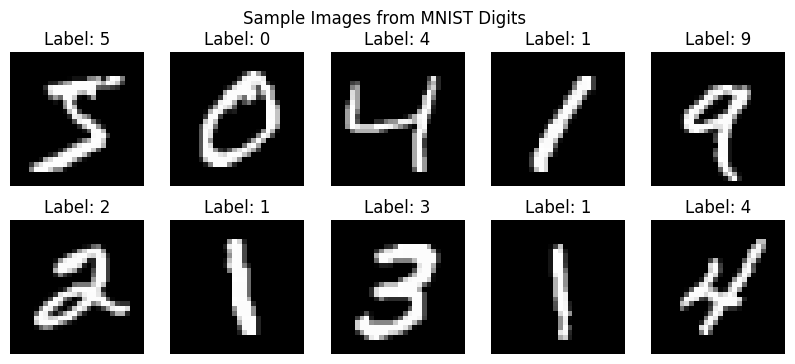

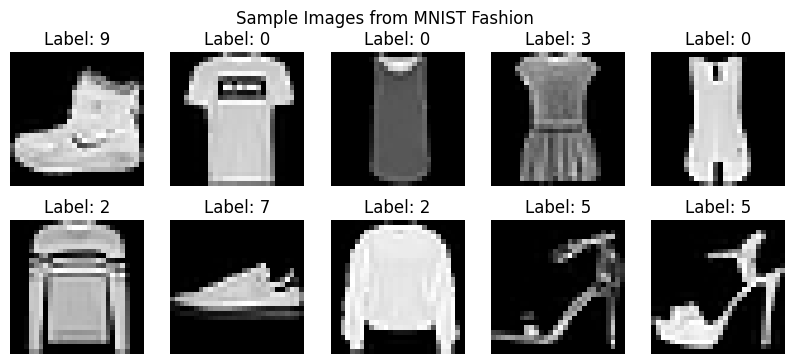

In [2]:
# Display sample images from MNIST Digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_mnist[i], cmap='gray')
    plt.title(f"Label: {y_train_mnist[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Digits")
plt.show()

# Display sample images from MNIST Fashion
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train_fashion[i], cmap='gray')
    plt.title(f"Label: {y_train_fashion[i]}")
    plt.axis('off')
plt.suptitle("Sample Images from MNIST Fashion")
plt.show()


**3. Dataset Analysis**

In [3]:
# MNIST Digits
num_train_mnist = x_train_mnist.shape[0]
num_test_mnist = x_test_mnist.shape[0]
total_mnist = num_train_mnist + num_test_mnist

print("MNIST Digits:")
print("  Training samples:", num_train_mnist)
print("  Testing samples:", num_test_mnist)
print("  Total samples:", total_mnist)

# MNIST Fashion
num_train_fashion = x_train_fashion.shape[0]
num_test_fashion = x_test_fashion.shape[0]
total_fashion = num_train_fashion + num_test_fashion

print("\nMNIST Fashion:")
print("  Training samples:", num_train_fashion)
print("  Testing samples:", num_test_fashion)
print("  Total samples:", total_fashion)


MNIST Digits:
  Training samples: 60000
  Testing samples: 10000
  Total samples: 70000

MNIST Fashion:
  Training samples: 60000
  Testing samples: 10000
  Total samples: 70000


In [4]:
# Unique labels for MNIST Digits
unique_labels_mnist = np.unique(np.concatenate([y_train_mnist, y_test_mnist]))
print("\nMNIST Digits Classes:", unique_labels_mnist)

# Unique labels for MNIST Fashion
unique_labels_fashion = np.unique(np.concatenate([y_train_fashion, y_test_fashion]))
print("MNIST Fashion Classes:", unique_labels_fashion)



MNIST Digits Classes: [0 1 2 3 4 5 6 7 8 9]
MNIST Fashion Classes: [0 1 2 3 4 5 6 7 8 9]


# **PART-2**

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 128
z_dim = 100
lr = 0.0002
num_epochs = 25  # For demonstration; increase for better results

# Transform: Normalize images to [-1, 1] (needed for Tanh output)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


**Generator**

In [6]:
class Generator(nn.Module):
    def __init__(self, z_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28*28),
            nn.Tanh()  # Output in [-1, 1]
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(z.size(0), 1, 28, 28)
        return img


**Discriminator**

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.model(img_flat)
        return validity


**Load MNIST Digits**

In [8]:
# Load full MNIST Digits training set
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_loader = DataLoader(mnist_dataset, batch_size=batch_size, shuffle=True)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.80MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.26MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



** Initialize Models and Optimizers**

In [9]:
# Initialize generator and discriminator
generator = Generator(z_dim).to(device)
discriminator = Discriminator().to(device)

optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Binary Cross-Entropy loss
adversarial_loss = nn.BCELoss()


**Training Loop**

In [10]:
G_losses, D_losses = [], []

print("Training GAN on full MNIST Digits...")
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(mnist_loader):
        batch_size_curr = imgs.size(0)
        imgs = imgs.to(device)

        # Adversarial ground truths
        valid = torch.ones(batch_size_curr, 1, device=device)
        fake = torch.zeros(batch_size_curr, 1, device=device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        optimizer_D.zero_grad()

        # Loss for real images
        real_preds = discriminator(imgs)
        d_real_loss = adversarial_loss(real_preds, valid)

        # Generate fake images
        z = torch.randn(batch_size_curr, z_dim, device=device)
        gen_imgs = generator(z)
        fake_preds = discriminator(gen_imgs.detach())
        d_fake_loss = adversarial_loss(fake_preds, fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------
        optimizer_G.zero_grad()
        # Generator wants discriminator to think fake images are real
        gen_preds = discriminator(gen_imgs)
        g_loss = adversarial_loss(gen_preds, valid)
        g_loss.backward()
        optimizer_G.step()

        # Save losses for monitoring
        G_losses.append(g_loss.item())
        D_losses.append(d_loss.item())

        if i % 200 == 0:
            print(f"[Epoch {epoch+1}/{num_epochs}] [Batch {i}/{len(mnist_loader)}] "
                  f"[D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


Training GAN on full MNIST Digits...
[Epoch 1/25] [Batch 0/469] [D loss: 1.3897] [G loss: 0.6619]
[Epoch 1/25] [Batch 200/469] [D loss: 0.0941] [G loss: 3.3027]
[Epoch 1/25] [Batch 400/469] [D loss: 0.1072] [G loss: 14.6337]
[Epoch 2/25] [Batch 0/469] [D loss: 0.0771] [G loss: 10.0019]
[Epoch 2/25] [Batch 200/469] [D loss: 2.4060] [G loss: 4.4565]
[Epoch 2/25] [Batch 400/469] [D loss: 1.5208] [G loss: 3.4896]
[Epoch 3/25] [Batch 0/469] [D loss: 0.6697] [G loss: 6.6213]
[Epoch 3/25] [Batch 200/469] [D loss: 0.4832] [G loss: 2.1803]
[Epoch 3/25] [Batch 400/469] [D loss: 0.8251] [G loss: 1.4083]
[Epoch 4/25] [Batch 0/469] [D loss: 0.5292] [G loss: 2.4550]
[Epoch 4/25] [Batch 200/469] [D loss: 0.1324] [G loss: 4.5878]
[Epoch 4/25] [Batch 400/469] [D loss: 0.2262] [G loss: 2.9944]
[Epoch 5/25] [Batch 0/469] [D loss: 0.1181] [G loss: 4.7687]
[Epoch 5/25] [Batch 200/469] [D loss: 0.0693] [G loss: 5.0632]
[Epoch 5/25] [Batch 400/469] [D loss: 0.0482] [G loss: 5.2708]
[Epoch 6/25] [Batch 0/469]

**Plot Loss Curves**

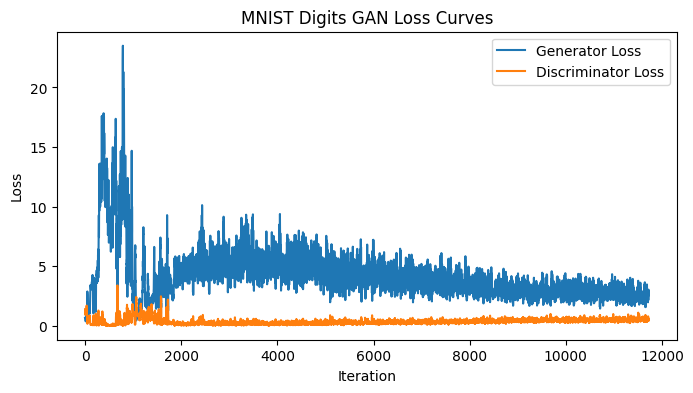

In [11]:
plt.figure(figsize=(8,4))
plt.plot(G_losses, label="Generator Loss")
plt.plot(D_losses, label="Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("MNIST Digits GAN Loss Curves")
plt.show()


**Generate 10 New Images from the Trained GAN**

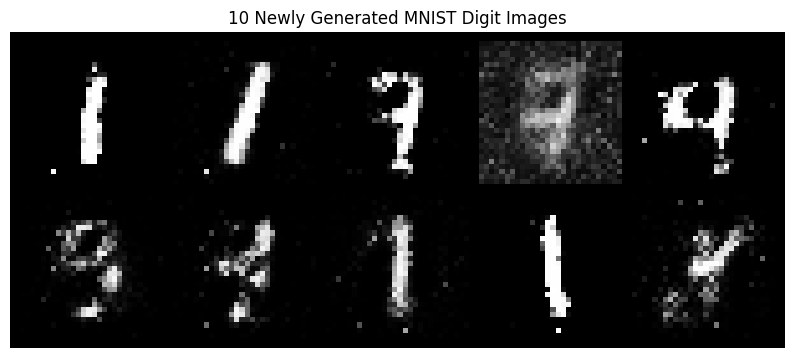

In [12]:
generator.eval()  # Set to evaluation mode
with torch.no_grad():
    z = torch.randn(10, z_dim, device=device)
    gen_imgs = generator(z)
    # Denormalize from [-1,1] to [0,1]
    gen_imgs = 0.5 * gen_imgs + 0.5

# Create a grid of images and display
grid = utils.make_grid(gen_imgs, nrow=5)
plt.figure(figsize=(10,5))
plt.imshow(grid.cpu().permute(1,2,0))
plt.title("10 Newly Generated MNIST Digit Images")
plt.axis("off")
plt.show()


**Filter the MNIST Dataset for Digit 6**

In [13]:
target_digit = 6
indices = [i for i, label in enumerate(mnist_dataset.targets) if label == target_digit]
digit6_subset = Subset(mnist_dataset, indices)
digit6_loader = DataLoader(digit6_subset, batch_size=batch_size, shuffle=True)


**(Re)Initialize and Train a GAN on Only Digit 6**

In [14]:
# Reinitialize models for digit-6 GAN
generator_digit6 = Generator(z_dim).to(device)
discriminator_digit6 = Discriminator().to(device)

optimizer_G6 = optim.Adam(generator_digit6.parameters(), lr=lr)
optimizer_D6 = optim.Adam(discriminator_digit6.parameters(), lr=lr)

print("Training GAN on MNIST Digit 6 only...")
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(digit6_loader):
        batch_size_curr = imgs.size(0)
        imgs = imgs.to(device)

        valid = torch.ones(batch_size_curr, 1, device=device)
        fake = torch.zeros(batch_size_curr, 1, device=device)

        # Train Discriminator
        optimizer_D6.zero_grad()
        real_preds = discriminator_digit6(imgs)
        d_real_loss = adversarial_loss(real_preds, valid)

        z = torch.randn(batch_size_curr, z_dim, device=device)
        gen_imgs = generator_digit6(z)
        fake_preds = discriminator_digit6(gen_imgs.detach())
        d_fake_loss = adversarial_loss(fake_preds, fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D6.step()

        # Train Generator
        optimizer_G6.zero_grad()
        gen_preds = discriminator_digit6(gen_imgs)
        g_loss = adversarial_loss(gen_preds, valid)
        g_loss.backward()
        optimizer_G6.step()

    if (epoch+1) % 5 == 0:
        print(f"[Digit6 GAN Epoch {epoch+1}/{num_epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


Training GAN on MNIST Digit 6 only...
[Digit6 GAN Epoch 5/25] [D loss: 0.5893] [G loss: 3.5255]
[Digit6 GAN Epoch 10/25] [D loss: 0.3642] [G loss: 7.1483]
[Digit6 GAN Epoch 20/25] [D loss: 0.4341] [G loss: 4.5448]
[Digit6 GAN Epoch 25/25] [D loss: 1.1064] [G loss: 2.0202]


**Generate 5 Images for Digit 6**

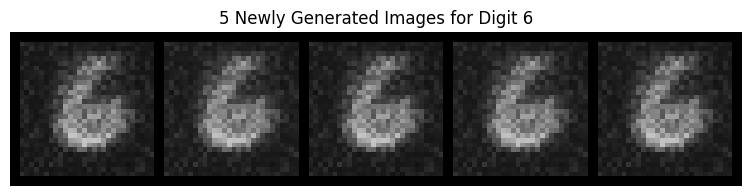

In [15]:
generator_digit6.eval()
with torch.no_grad():
    z = torch.randn(5, z_dim, device=device)
    gen_imgs6 = generator_digit6(z)
    gen_imgs6 = 0.5 * gen_imgs6 + 0.5

grid6 = utils.make_grid(gen_imgs6, nrow=5)
plt.figure(figsize=(10,2))
plt.imshow(grid6.cpu().permute(1,2,0))
plt.title("5 Newly Generated Images for Digit 6")
plt.axis("off")
plt.show()


**Load and Filter the FashionMNIST Dataset**

In [16]:
# Load FashionMNIST
fashion_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Filter dataset for sneakers (label 7)
target_fashion = 7  # Sneaker
indices_fashion = [i for i, label in enumerate(fashion_dataset.targets) if label == target_fashion]
fashion_subset = Subset(fashion_dataset, indices_fashion)
fashion_loader = DataLoader(fashion_subset, batch_size=batch_size, shuffle=True)


100%|██████████| 26.4M/26.4M [00:02<00:00, 10.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.73MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.61MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**Initialize and Train a GAN on the Sneaker Subset**

In [17]:
# Initialize models for Fashion GAN
generator_fashion = Generator(z_dim).to(device)
discriminator_fashion = Discriminator().to(device)

optimizer_G_fashion = optim.Adam(generator_fashion.parameters(), lr=lr)
optimizer_D_fashion = optim.Adam(discriminator_fashion.parameters(), lr=lr)

print("Training GAN on FashionMNIST Sneaker images...")
for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(fashion_loader):
        batch_size_curr = imgs.size(0)
        imgs = imgs.to(device)

        valid = torch.ones(batch_size_curr, 1, device=device)
        fake = torch.zeros(batch_size_curr, 1, device=device)

        # Train Discriminator
        optimizer_D_fashion.zero_grad()
        real_preds = discriminator_fashion(imgs)
        d_real_loss = adversarial_loss(real_preds, valid)

        z = torch.randn(batch_size_curr, z_dim, device=device)
        gen_imgs = generator_fashion(z)
        fake_preds = discriminator_fashion(gen_imgs.detach())
        d_fake_loss = adversarial_loss(fake_preds, fake)

        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        optimizer_D_fashion.step()

        # Train Generator
        optimizer_G_fashion.zero_grad()
        gen_preds = discriminator_fashion(gen_imgs)
        g_loss = adversarial_loss(gen_preds, valid)
        g_loss.backward()
        optimizer_G_fashion.step()

    if (epoch+1) % 5 == 0:
        print(f"[Fashion GAN Epoch {epoch+1}/{num_epochs}] [D loss: {d_loss.item():.4f}] [G loss: {g_loss.item():.4f}]")


Training GAN on FashionMNIST Sneaker images...
[Fashion GAN Epoch 5/25] [D loss: 1.7157] [G loss: 0.9990]
[Fashion GAN Epoch 10/25] [D loss: 0.3743] [G loss: 4.4166]
[Fashion GAN Epoch 15/25] [D loss: 0.6772] [G loss: 2.0466]
[Fashion GAN Epoch 20/25] [D loss: 1.8615] [G loss: 0.7974]
[Fashion GAN Epoch 25/25] [D loss: 1.8242] [G loss: 0.4672]


**Generate and Display Sneaker Images**

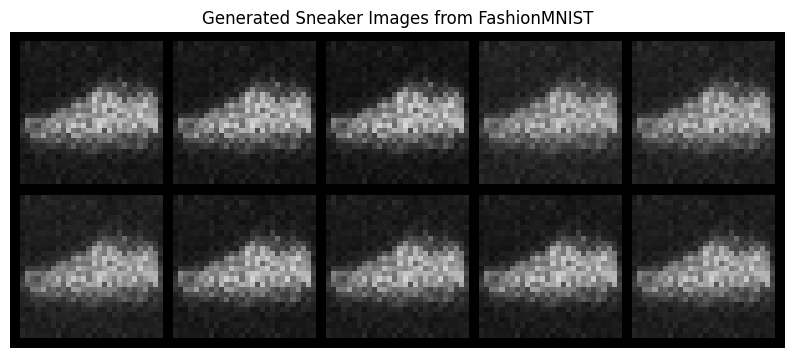

In [18]:
generator_fashion.eval()
with torch.no_grad():
    z = torch.randn(10, z_dim, device=device)
    gen_fashion_imgs = generator_fashion(z)
    gen_fashion_imgs = 0.5 * gen_fashion_imgs + 0.5

grid_fashion = utils.make_grid(gen_fashion_imgs, nrow=5)
plt.figure(figsize=(10,5))
plt.imshow(grid_fashion.cpu().permute(1,2,0))
plt.title("Generated Sneaker Images from FashionMNIST")
plt.axis("off")
plt.show()


# **PART-3**

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
batch_size = 128
latent_dim = 20
learning_rate = 1e-3
num_epochs = 10  # Increase for better performance

transform = transforms.Compose([
    transforms.ToTensor()
])


**VAE Architecture**

In [20]:
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        # Encoder: Input (1,28,28) -> (32,14,14) -> (64,7,7)
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),  # (32, 14,14)
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # (64, 7,7)
            nn.ReLU()
        )
        self.fc_mu    = nn.Linear(64 * 7 * 7, latent_dim)
        self.fc_logvar = nn.Linear(64 * 7 * 7, latent_dim)

        # Decoder: map latent vector back to feature map, then use ConvTranspose2d
        self.fc_decode = nn.Linear(latent_dim, 64 * 7 * 7)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # (32,14,14)
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),   # (1,28,28)
            nn.Sigmoid()  # Output in [0,1] for BCE loss
        )

    def encode(self, x):
        h = self.encoder(x)
        h = h.view(x.size(0), -1)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = self.fc_decode(z)
        h = h.view(z.size(0), 64, 7, 7)
        x_recon = self.decoder(h)
        return x_recon

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar


**Loss Function**

In [21]:
def vae_loss(recon_x, x, mu, logvar):
    # Reconstruction loss (BCE)
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    # KL divergence
    KL = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KL


**Load MNIST Dataset**

In [22]:
mnist_train = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
mnist_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True)


**Initialize the Model and Optimizer**

In [23]:
vae = VAE(latent_dim).to(device)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)


**Training Loop**

In [24]:
vae.train()
for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(mnist_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = vae(data)
        loss = vae_loss(recon, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    avg_loss = train_loss / len(mnist_train)
    print(f"Epoch {epoch+1}/{num_epochs}, Average Loss: {avg_loss:.4f}")


Epoch 1/10, Average Loss: 148.8050
Epoch 2/10, Average Loss: 113.3671
Epoch 3/10, Average Loss: 109.0835
Epoch 4/10, Average Loss: 107.0673
Epoch 5/10, Average Loss: 105.8702
Epoch 6/10, Average Loss: 105.0764
Epoch 7/10, Average Loss: 104.3988
Epoch 8/10, Average Loss: 103.8041
Epoch 9/10, Average Loss: 103.4271
Epoch 10/10, Average Loss: 102.9485


**Visualizing**

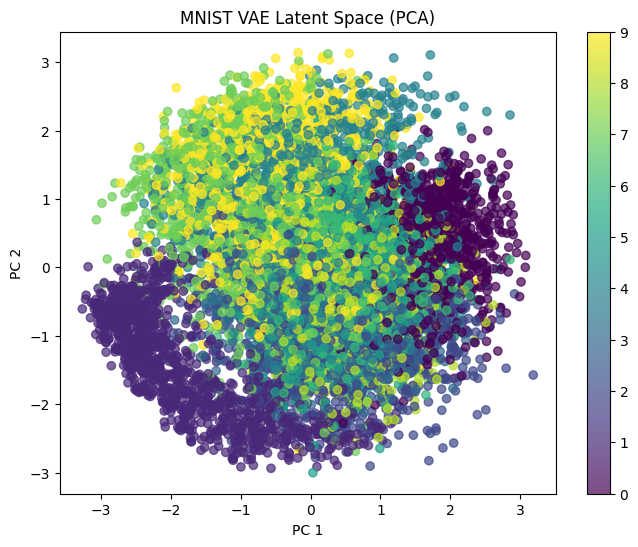

In [25]:
# Load MNIST test data
mnist_test = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

all_mu = []
all_labels = []
vae.eval()
with torch.no_grad():
    for data, labels in test_loader:
        data = data.to(device)
        mu, _ = vae.encode(data)
        all_mu.append(mu.cpu())
        all_labels.append(labels)
all_mu = torch.cat(all_mu, dim=0)
all_labels = torch.cat(all_labels, dim=0)

# PCA for 2D visualization
pca = PCA(n_components=2)
latent_2d = pca.fit_transform(all_mu.numpy())

plt.figure(figsize=(8,6))
scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=all_labels.numpy(), cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.title("MNIST VAE Latent Space (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


**Generate 10 New Images**

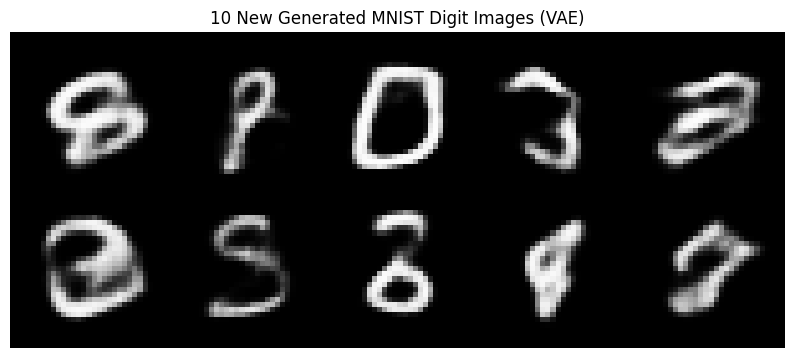

In [26]:
vae.eval()
with torch.no_grad():
    z = torch.randn(10, latent_dim).to(device)
    samples = vae.decode(z).cpu()

grid = utils.make_grid(samples, nrow=5)
plt.figure(figsize=(10,5))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap='gray')
plt.title("10 New Generated MNIST Digit Images (VAE)")
plt.axis("off")
plt.show()


**Generating Specific Digits Using Stored Latent Vectors**

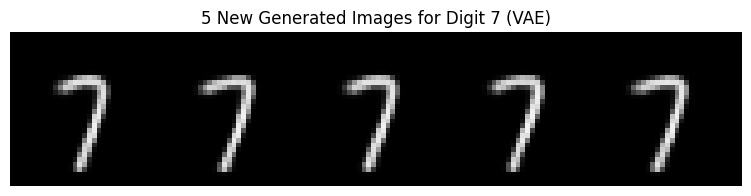

In [28]:
def generate_specific_digit(digit, num_samples=1, noise_scale=0.1):
    """
    Generate new images for a specific digit by sampling from stored latent vectors.
    """
    # Find indices where the test set has the given digit label
    indices = (all_labels == digit).nonzero(as_tuple=True)[0]
    latent_vectors = all_mu[indices]

    # Randomly select one latent vector
    selected = latent_vectors[torch.randint(len(latent_vectors), (1,))]

    selected = selected.squeeze(0)

    # Create num_samples latent codes by repeating and adding small noise
    new_latents = selected.unsqueeze(0).repeat(num_samples, 1) + noise_scale * torch.randn(num_samples, latent_dim)

    with torch.no_grad():
        generated = vae.decode(new_latents.to(device)).cpu()
    return generated

# Generate 5 images for digit 7
generated_digit7 = generate_specific_digit(digit=7, num_samples=5, noise_scale=0.1)
grid7 = utils.make_grid(generated_digit7, nrow=5)
plt.figure(figsize=(10,2))
plt.imshow(grid7.permute(1, 2, 0).squeeze(), cmap='gray')
plt.title("5 New Generated Images for Digit 7 (VAE)")
plt.axis("off")
plt.show()


**Load and Filter FashionMNIST**

In [29]:
fashion_train = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
# In FashionMNIST, label 7 corresponds to sneakers.
shoe_indices = (fashion_train.targets == 7).nonzero(as_tuple=True)[0]
fashion_shoe_subset = Subset(fashion_train, shoe_indices)
fashion_loader = DataLoader(fashion_shoe_subset, batch_size=batch_size, shuffle=True)


**Initialize and Train a New VAE for Shoe Images**

In [30]:
vae_fashion = VAE(latent_dim).to(device)
optimizer_fashion = optim.Adam(vae_fashion.parameters(), lr=learning_rate)
num_epochs_fashion = 10  # Adjust as needed

vae_fashion.train()
for epoch in range(num_epochs_fashion):
    train_loss_fashion = 0
    for batch_idx, (data, _) in enumerate(fashion_loader):
        data = data.to(device)
        optimizer_fashion.zero_grad()
        recon, mu, logvar = vae_fashion(data)
        loss = vae_loss(recon, data, mu, logvar)
        loss.backward()
        train_loss_fashion += loss.item()
        optimizer_fashion.step()
    avg_loss = train_loss_fashion / len(fashion_shoe_subset)
    print(f"Fashion VAE Epoch {epoch+1}/{num_epochs_fashion}, Average Loss: {avg_loss:.4f}")


Fashion VAE Epoch 1/10, Average Loss: 281.8611
Fashion VAE Epoch 2/10, Average Loss: 188.1214
Fashion VAE Epoch 3/10, Average Loss: 181.8642
Fashion VAE Epoch 4/10, Average Loss: 178.7912
Fashion VAE Epoch 5/10, Average Loss: 176.4220
Fashion VAE Epoch 6/10, Average Loss: 173.9614
Fashion VAE Epoch 7/10, Average Loss: 172.1007
Fashion VAE Epoch 8/10, Average Loss: 170.2328
Fashion VAE Epoch 9/10, Average Loss: 168.9930
Fashion VAE Epoch 10/10, Average Loss: 168.1495


**Generate and Display Shoe Images**

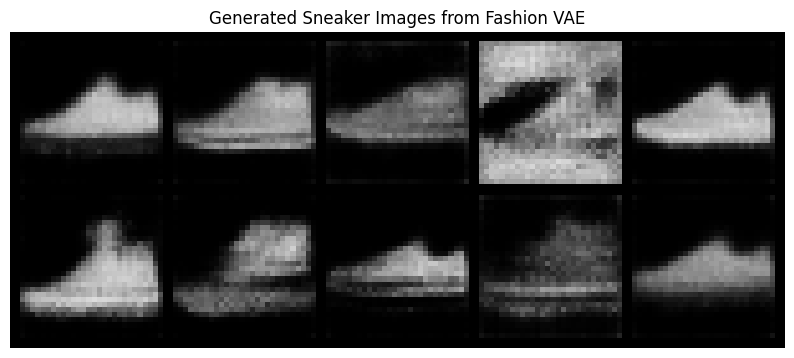

In [31]:
vae_fashion.eval()
with torch.no_grad():
    z = torch.randn(10, latent_dim).to(device)
    shoe_samples = vae_fashion.decode(z).cpu()

grid_shoe = utils.make_grid(shoe_samples, nrow=5)
plt.figure(figsize=(10,5))
plt.imshow(grid_shoe.permute(1, 2, 0).squeeze(), cmap='gray')
plt.title("Generated Sneaker Images from Fashion VAE")
plt.axis("off")
plt.show()


# **PART-4**

**a. Image Quality**

**GANs:**
*   They usually make images that look sharper and more lifelike.
*   Sometimes they might miss a few details or collapse to a few styles, but overall, the images are pretty crisp.

**VAEs:**



*   The images tend to be a bit blurry.
*   They capture the general shape and style but often lack the sharp details you see in GANs.






**b. Training Stability**

**GANs:**

*   These are trickier to train. You often have to keep a close eye on both parts (the generator and the discriminator) because they can easily get out of balance.
*  This means you might see weird training swings or even the generator failing sometimes.

**VAEs:**

*  They’re generally more stable and easier to train.
*  You don't have that tug-of-war happening, so things usually go smoother.

**c. Latent Space Representation**

**GANs:**

*   The hidden “code” or latent space in GANs isn’t made to be super organized.
*  You can get good results when you play around with it, but it’s not really built for smooth changes or easy interpretation.

**VAEs:**

*  VAEs have a clear and smooth latent space because of how they’re built with an encoder.
*  This means if you change the latent code a little, the generated image changes gradually, which is great for tasks like interpolation.




**Potential Improvements (Hyperparameter Tuning)**

**For GANs:**

*  Try different network setups (like using a deeper network or methods like WGAN).
*  Adjust the learning rates and batch sizes to keep both parts in balance.
*  Use tricks like label smoothing or gradient penalties to help make training more stable.


**For VAEs:**

*  Play with the weight of the KL divergence term (sometimes called a beta-VAE) to balance image clarity and a smooth latent space.
*  Experiment with different sizes for the latent space—too small might lose detail, too big might not regularize well.
*   Consider adding extra loss terms to help sharpen the output images.

# **PART-5**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


# Read the CSV file
df = pd.read_csv("data.csv")

# Extract features and labels
X = df[['Feature1', 'Feature2']].values
y = df['Class'].values

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Create full dataset loader (for evaluation)
full_dataset = TensorDataset(X_tensor, y_tensor)
full_loader = DataLoader(full_dataset, batch_size=128, shuffle=True)

# Create training dataset using only normal data (label 0)
normal_indices = (y_tensor == 0).nonzero(as_tuple=True)[0]
X_normal_tensor = X_tensor[normal_indices]
train_dataset = TensorDataset(X_normal_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


In [5]:
# -------------------------------
# 3. Define a VAE for 2D Data
# -------------------------------

class VAE(nn.Module):
    def __init__(self, input_dim=2, latent_dim=2):
        super(VAE, self).__init__()
        # Encoder
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc_mu = nn.Linear(8, latent_dim)
        self.fc_logvar = nn.Linear(8, latent_dim)
        # Decoder
        self.fc3 = nn.Linear(latent_dim, 8)
        self.fc4 = nn.Linear(8, 16)
        self.fc5 = nn.Linear(16, input_dim)
        self.relu = nn.ReLU()

    def encode(self, x):
        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc2(h1))
        mu = self.fc_mu(h2)
        logvar = self.fc_logvar(h2)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = self.relu(self.fc3(z))
        h4 = self.relu(self.fc4(h3))
        return self.fc5(h4)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z)
        return x_recon, mu, logvar

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vae = VAE(input_dim=2, latent_dim=2).to(device)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)


In [6]:
# -------------------------------
# 4. Define the VAE Loss Function
# -------------------------------

def vae_loss(recon_x, x, mu, logvar):
    mse = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse + kl

In [7]:
# -------------------------------
# 5. Train the VAE on Normal Data
# -------------------------------

num_epochs = 100
vae.train()
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_loader:
        x_batch = batch[0].to(device)
        optimizer.zero_grad()
        recon, mu, logvar = vae(x_batch)
        loss = vae_loss(recon, x_batch, mu, logvar)
        loss.backward()
        total_loss += loss.item()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_dataset):.4f}")

Epoch 10/100, Loss: 0.6334
Epoch 20/100, Loss: 0.6306
Epoch 30/100, Loss: 0.6314
Epoch 40/100, Loss: 0.6304
Epoch 50/100, Loss: 0.6308
Epoch 60/100, Loss: 0.6307
Epoch 70/100, Loss: 0.6308
Epoch 80/100, Loss: 0.6308
Epoch 90/100, Loss: 0.6308
Epoch 100/100, Loss: 0.6307


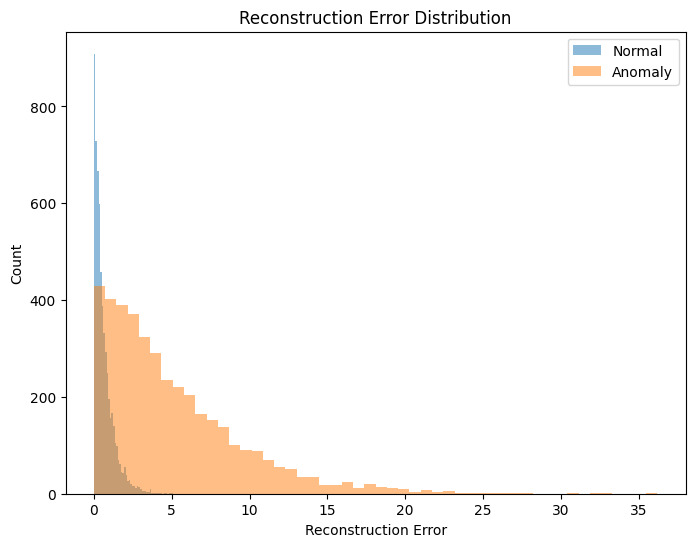

In [8]:
# -------------------------------
# 6. Evaluate the VAE for Anomaly Detection
# -------------------------------

vae.eval()
recon_errors = []
true_labels = []
with torch.no_grad():
    for batch in full_loader:
        x_batch, labels_batch = batch[0].to(device), batch[1].to(device)
        recon, mu, logvar = vae(x_batch)
        # Compute reconstruction error (squared error summed over features)
        error = torch.sum((recon - x_batch)**2, dim=1)
        recon_errors.append(error.cpu().numpy())
        true_labels.append(labels_batch.cpu().numpy())

recon_errors = np.concatenate(recon_errors)
true_labels = np.concatenate(true_labels)

# Plot histogram of reconstruction errors for normal and anomaly samples
plt.figure(figsize=(8,6))
plt.hist(recon_errors[true_labels == 0], bins=50, alpha=0.5, label='Normal')
plt.hist(recon_errors[true_labels == 1], bins=50, alpha=0.5, label='Anomaly')
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

In [9]:
thresholds = np.linspace(np.min(recon_errors), np.max(recon_errors), 1000)
accuracies = []
for t in thresholds:
    preds = (recon_errors > t).astype(int)
    acc = np.mean(preds == true_labels)
    accuracies.append(acc)
accuracies = np.array(accuracies)
idx = np.argmin(np.abs(accuracies - 0.85))
selected_threshold = thresholds[idx]
selected_accuracy = accuracies[idx]
predicted_labels = (recon_errors > selected_threshold).astype(int)

# Print performance metrics
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))




Confusion Matrix:
[[5875  125]
 [1377 2623]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6000
           1       0.95      0.66      0.78      4000

    accuracy                           0.85     10000
   macro avg       0.88      0.82      0.83     10000
weighted avg       0.87      0.85      0.84     10000



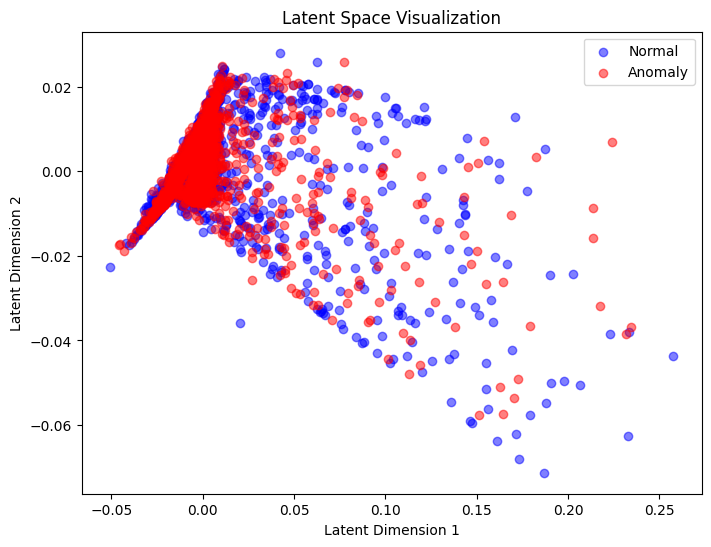

In [10]:
# -------------------------------
# 7. Visualize the Latent Space (Optional)
# -------------------------------

# Extract latent representations from the full dataset
all_mu = []
with torch.no_grad():
    for batch in full_loader:
        x_batch, _ = batch[0].to(device), batch[1].to(device)
        mu, _ = vae.encode(x_batch)
        all_mu.append(mu.cpu().numpy())
all_mu = np.concatenate(all_mu, axis=0)

plt.figure(figsize=(8,6))
plt.scatter(all_mu[true_labels == 0, 0], all_mu[true_labels == 0, 1],
            c='blue', alpha=0.5, label='Normal')
plt.scatter(all_mu[true_labels == 1, 0], all_mu[true_labels == 1, 1],
            c='red', alpha=0.5, label='Anomaly')
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space Visualization")
plt.legend()
plt.show()